<a href="https://colab.research.google.com/github/tasanyphy01773/ClimateScience/blob/main/Analizing_climate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

In [ ]:
fname = '/content/data from tanvir sir on climate phy.nc'

In [ ]:
ds=xr.open_dataset(fname)
# ds = xray.open_dataset(filename, , decode_times=False)

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 69, level: 37, longitude: 97, time: 24)
Coordinates:
  * latitude   (latitude) float64 32.0 31.75 31.5 31.25 ... 15.5 15.25 15.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 78.0 78.25 78.5 78.75 ... 101.5 101.8 102.0
  * time       (time) datetime64[ns] 2015-04-01 ... 2015-04-01T23:00:00
Data variables:
    T          (time, level, latitude, longitude) float32 ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper02 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Sat Aug 31 22:15:12 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Thu Jul 16 07:32:49 2020: ncks -d time,0,23,1 -d la...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [ ]:
ds['T']

<xarray.DataArray 'T' (time: 24, level: 37, latitude: 69, longitude: 97)>
[5943384 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 32.0 31.75 31.5 31.25 ... 15.5 15.25 15.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 78.0 78.25 78.5 78.75 ... 101.5 101.8 102.0
  * time       (time) datetime64[ns] 2015-04-01 ... 2015-04-01T23:00:00
Attributes:
    long_name:                     Temperature
    short_name:                    t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               130
    minimum_value:                 183.02908
    maximum_value:                 316.54047
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric pressure level analysis [...
    number_of_significant_digits:  7

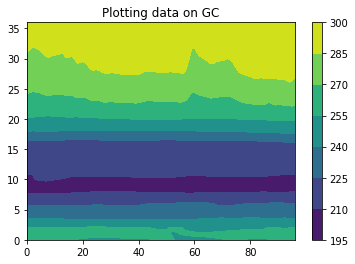

In [ ]:
plt.title('Plotting data on GC')
plt.contourf(ds['T'][0,:,0,:])
plt.colorbar()

**Analysis using Xarray**

In [ ]:
!pip install netcdf4

In [ ]:
import warnings

import numpy as np 
import pandas as pd
import xarray as xr 
import matplotlib.pyplot as plt 

In [ ]:
 warnings.filterwarnings("ignore")

In [ ]:
fname = '/data from tanvir sir on climate phy.nc'

In [ ]:
ds = xr.open_mfdataset(fname, concat_dim='ensemble', combine='nested', decode_times=True)
print(fname)

/data from tanvir sir on climate phy.nc


In [ ]:
ds

<xarray.Dataset>
Dimensions:    (ensemble: 1, latitude: 69, level: 37, longitude: 97, time: 24)
Coordinates:
  * latitude   (latitude) float64 32.0 31.75 31.5 31.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2015-04-01 ... 2015-04-01T23:00:00
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 78.0 78.25 78.5 78.75 ... 101.5 101.8 102.0
Dimensions without coordinates: ensemble
Data variables:
    T          (ensemble, time, level, latitude, longitude) float32 dask.array<chunksize=(1, 24, 37, 69, 97), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper02 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Sat Aug 31 22:15:12 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Thu Jul 16 07:32:49 2020: ncks -d time,0,23,1 -d la...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [ ]:
ds['time'] = pd.to_datetime(ds.time.astype(str))

In [ ]:
ds_emean = ds.mean(dim='ensemble')

In [ ]:
ds_emean

<xarray.Dataset>
Dimensions:    (latitude: 69, level: 37, longitude: 97, time: 24)
Coordinates:
  * latitude   (latitude) float64 32.0 31.75 31.5 31.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2015-04-01 ... 2015-04-01T23:00:00
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 78.0 78.25 78.5 78.75 ... 101.5 101.8 102.0
Data variables:
    T          (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 37, 69, 97), meta=np.ndarray>

In [ ]:
ds_climo = ds_emean.groupby('time.month').mean('time')
ds_anoms = (ds_emean.groupby('time.month')- ds_climo)

In [ ]:
# .sel requires dimension names rather than non-dimension coordinates.
#  You could use .where to filter by coordinate values if needed
ds_climopt = ds_climo.sel(longitude='283', latitude='39', method='nearest')
ds_anomspt = ds_anoms.sel(longitude='283', latitude='39', method='nearest')

## **Problem with the DATA**

Text(0.5, 1.0, 'Ploting the climatology')

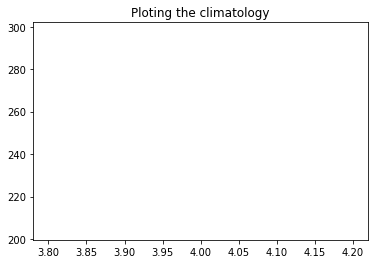

In [ ]:
# Plot the Climatology
plt.plot(ds_climopt['month'], ds_climopt['T'])
plt.title("Ploting the climatology")

## **Problem with the DATA**

In [ ]:
# Plot the Anomaly
plt.plot(ds_anomspt['month'], ds_anomspt['T'])
plt.title("Ploting the Anomly")

Initialized empty Git repository in /content/.git/


In [ ]:
import warnings 

import numpy as np 
import pandas as pd
import xarray as xr 
import matplotlib.pyplot as plt


In [ ]:
def get_model_name(fname):
  return modelname

In [ ]:
path = '/content/drive/MyDrive/Research Project/Data_or_files/'
fname = "Highres_pr_Amon_CMCC-CM2-VHR4_hist-1950_r1i1p1f1_gn_197901-201412.nc"

In [ ]:
!pip install netcdf4

     |████████████████████████████████| 4.7MB 16.8MB/s 
     |████████████████████████████████| 317kB 46.0MB/s 


In [ ]:
rmm_ds = xr.open_mfdataset(path+fname, concat_dim='model',combine='nested')

In [ ]:
rmm_ds = rmm_ds.squeeze()
rmm_ds 

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 768, lon: 1152, time: 432)
Coordinates:
  * lat        (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * time       (time) object 1979-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon        (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(432, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(1152, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(768, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(432, 768, 1152), meta=np.ndarray>
Attributes:
    CDI:                     Climate Data Interface version 1.9.3 (http://mpi...
    history:                 Wed Dec 23 16:55:15 2020: cdo mergetime pr_Amon_...
    source:                  CMCC-CM2-VHR4 (2017): \naerosol: prescribed MACv...
    institution:             Fondazione Centro Euro-Mediterraneo sui Cambiame...
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             HighResMIP
    branch_method:           fixed historical forcing from 1950 was applied f...
    branch_time_in_child:    365.0
    branch_time_in_parent:   19345.0
    creation_date:           2018-11-27T09:21:51Z
    data_specs_version:      01.00.23
    end_year:                2014
    experiment:              coupled historical 1950-2014
    experiment_id:           hist-1950
    external_variables:      areacella
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC-C...
    grid:                    native atmosphere regular grid (768x1152 latxlon)
    grid_label:              gn
    initialization_index:    1
    institution_id:          CMCC
    min_number_yrs_per_sim:  65
    mip_era:                 CMIP6
    nominal_resolution:      25 km
    parent_activity_id:      HighResMIP
    parent_experiment_id:    spinup-1950
    parent_mip_era:          CMIP6
    parent_source_id:        CMCC-CM2-VHR4
    parent_time_units:       days since 1950-01-01 00:00:00
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   atmos
    source_id:               CMCC-CM2-VHR4
    source_type:             AOGCM
    start_year:              1950
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Amon
    table_info:              Creation Date:(21 March 2018) MD5:48c44775086a08...
    title:                   CMCC-CM2-VHR4 output prepared for CMIP6
    tracking_id:             hdl:21.14100/eb288616-4179-4468-931a-147b46306640
    variable_id:             pr
    variant_label:           r1i1p1f1
    license:                 CMIP6 model data produced by CMCC is licensed un...
    cmor_version:            3.3.2
    CDO:                     Climate Data Operators version 1.9.3 (http://mpi...

In [ ]:
modelnames=['CCSM4-RSMAS','FIMr1p1-ESRL','GEFS-EMC','GEM-ECCC',
            'GEOS_V2p1-GMAO','NESM-NRL']
rmm_ds['model']=modelnames
rmm_ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 768, lon: 1152, model: 6, time: 432)
Coordinates:
  * lat        (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * time       (time) object 1979-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon        (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * model      (model) <U14 'CCSM4-RSMAS' 'FIMr1p1-ESRL' ... 'NESM-NRL'
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(432, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(1152, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(768, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(432, 768, 1152), meta=np.ndarray>
Attributes:
    CDI:                     Climate Data Interface version 1.9.3 (http://mpi...
    history:                 Wed Dec 23 16:55:15 2020: cdo mergetime pr_Amon_...
    source:                  CMCC-CM2-VHR4 (2017): \naerosol: prescribed MACv...
    institution:             Fondazione Centro Euro-Mediterraneo sui Cambiame...
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             HighResMIP
    branch_method:           fixed historical forcing from 1950 was applied f...
    branch_time_in_child:    365.0
    branch_time_in_parent:   19345.0
    creation_date:           2018-11-27T09:21:51Z
    data_specs_version:      01.00.23
    end_year:                2014
    experiment:              coupled historical 1950-2014
    experiment_id:           hist-1950
    external_variables:      areacella
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC-C...
    grid:                    native atmosphere regular grid (768x1152 latxlon)
    grid_label:              gn
    initialization_index:    1
    institution_id:          CMCC
    min_number_yrs_per_sim:  65
    mip_era:                 CMIP6
    nominal_resolution:      25 km
    parent_activity_id:      HighResMIP
    parent_experiment_id:    spinup-1950
    parent_mip_era:          CMIP6
    parent_source_id:        CMCC-CM2-VHR4
    parent_time_units:       days since 1950-01-01 00:00:00
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   atmos
    source_id:               CMCC-CM2-VHR4
    source_type:             AOGCM
    start_year:              1950
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Amon
    table_info:              Creation Date:(21 March 2018) MD5:48c44775086a08...
    title:                   CMCC-CM2-VHR4 output prepared for CMIP6
    tracking_id:             hdl:21.14100/eb288616-4179-4468-931a-147b46306640
    variable_id:             pr
    variant_label:           r1i1p1f1
    license:                 CMIP6 model data produced by CMCC is licensed un...
    cmor_version:            3.3.2
    CDO:                     Climate Data Operators version 1.9.3 (http://mpi...

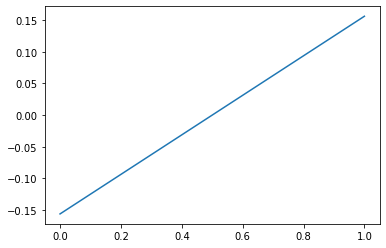

In [ ]:
plt.plot(rmm_ds['lon_bnds'][0,:])

Text(0, 0.5, 'value of y')

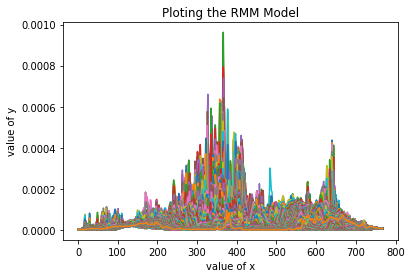

In [ ]:
# x = np.arange(0, 1000, 50)
# y = np.arange(0, 1, 0.0001)
plt.plot(rmm_ds['pr'][0,:,:])
plt.title("Ploting the RMM Model")
plt.xlabel("value of x")
plt.ylabel("value of y")
# plt.xticks(x)
# plt.yticks(y)

Text(0, 0.5, 'value of y')

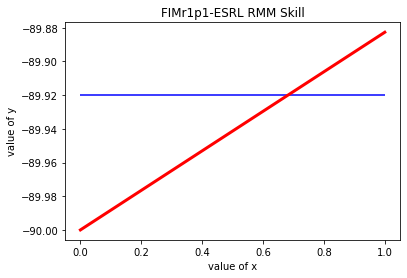

In [ ]:
plt.plot(rmm_ds['lat_bnds'][0,:], color = 'r', linewidth = 3.0)
plt.title(modelnames[1]+' RMM Skill')
plt.hlines(-89.92, 0.0, 1, color = 'b' )
plt.xlabel("value of x")
plt.ylabel("value of y")

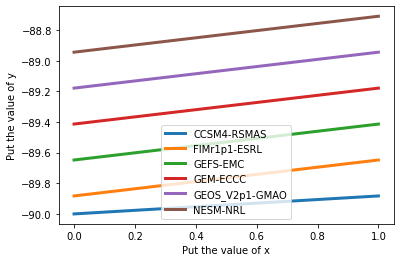

In [ ]:
for i,model in enumerate(rmm_ds['model'].values):
  plt.plot(rmm_ds['lat_bnds'][i,:], linewidth = 3.0)

plt.xlabel("Put the value of x")
plt.ylabel("Put the value of y")
plt.legend(modelnames)


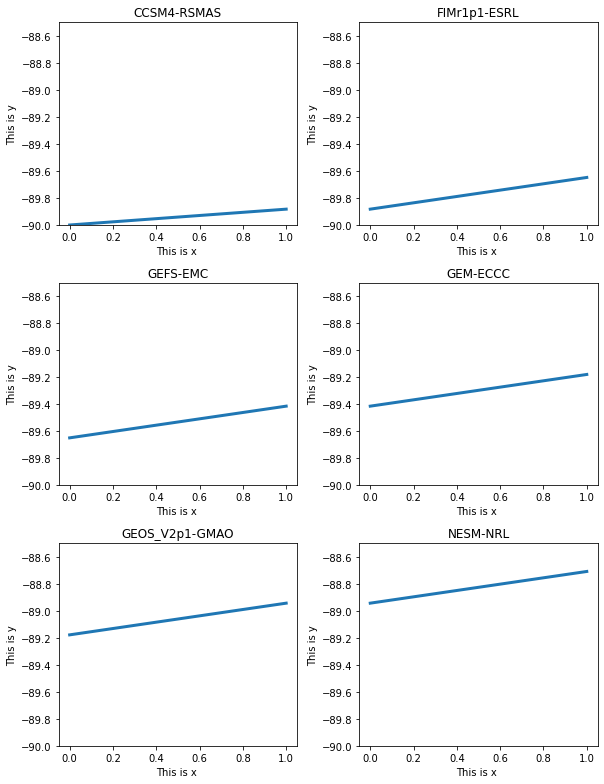

In [ ]:
#multiple plots on a page 
nrows = 3
ncols =2 
plt.figure(figsize =(8.5, 11))
for i, model in enumerate(rmm_ds['model'].values):
  plt.subplot(nrows, ncols, i+1)
  plt.plot(rmm_ds['lat_bnds'][i,:], linewidth=3.0)
  plt.xlabel("This is x ")
  plt.ylabel("This is y")
  plt.ylim(-90, -88.50)
  plt.title(model)
  plt.tight_layout()